In [1]:
# Import libraries:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math as mt

# Fix random seed for reproducibility:
np.random.seed(123)

Using TensorFlow backend.


In [2]:
# Two datasets are included, related to red and white vinho verde wine samples, 
# from the north of Portugal. The goal is to model wine quality based on physicochemical tests

import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, delimiter=';')
dataset = df.as_matrix()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# Split into input (X) and output (Y) variables
X = dataset[:,0:11]
X = preprocessing.scale(X) # normalize data:
Y_train = []
Y = dataset[:,11]
Y_train = []
for y in Y:
    if y < 6: Y_train.append([1, 0])
    else: Y_train.append([0, 1])

In [4]:
# Create model:
NR_FEATURES = 11
NR_CLASSES = 2
NR_HIDDEN1 = 8
NR_HIDDEN2 = 4

model = Sequential()
model.add(Dense(NR_HIDDEN1, input_dim=NR_FEATURES, activation='relu'))
model.add(Dense(NR_HIDDEN2, activation='relu'))
model.add(Dense(NR_CLASSES, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________


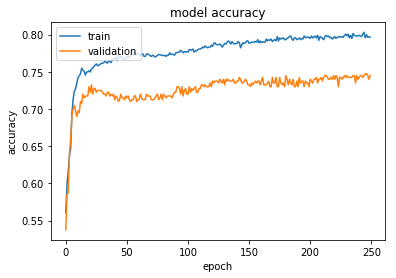

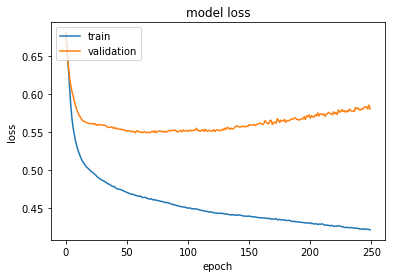

In [5]:
# Simulation 
VALIDATION_SPLIT = 0.25
EPOCHS = 250
BATCH_SIZE = 32
LOSS = 'categorical_crossentropy'
OPTIMIZER = 'adam'

# Fit the model:
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X, Y_train, validation_split=VALIDATION_SPLIT, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

# Summarize history for accuracy:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Summarize history for loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()